
<span style="font-size:12px;">

#### <span style="color: yellow;"> BERT 모델

- 양쪽 문맥을 이해
- 트랜스포머 인코더만 사용해서 양방향으로 문맥을 파악하는 언어모델
- 강점 : 빈칸채우기

- 핵심
    - Transformer Encoder 기반
    - 양방향(Bidirectional) 문맥 이해
    - 사전학습(Pretraining) + 파인튜닝(Fine-tuning) 방식
- 기본구조 
    - [CLS] 토큰 : 문장의 시작을 표시하는 토큰, 문장 단위 태스크(감성분석, 문장 분류 등)에서 문장 전체 의미를 담는 벡터로 사용
    - [SEP] 토큰 : 두 문장 사이 경계 표시
    - [MASK] 토큰 : 일부 단어를 임의로 가린(mask) 토큰
    
- 과정
    - 데이터
    - Hugging Face Transformers Pipeline(간단한 AIP)
    - 토크나이저 (텍스트 -> 토큰 -> 숫자ID)
    - 사전학습된 모델(BERT, GPT-2, DistilBERT 등)
    - 예측 결과 (감성분석, 텍스트 생성, 문장 유사도 판단)
    - 후처리 평가(확률 변환, 정확도 계산)

<span style="font-size:12px;">
  
- <span style="color: yellow;">  BERT 사전 학습 방법
    - MLM(masked language model) : 문장의 15%를 마스크 처리한 다음에 예측
    - NSP(next sentence prediction) : 두 문장이 연결되는지를 판단

- 예시   
"I went to the [MASK] to buy some milk" 
    - BERT 예측 : [MASK] = store (앞 뒤의 문맥인 buy, milk를 보고 추론 )

- 사전학습(대규모 텍스트)
- [CLS] token 추가
- 특정 태스크 레이블로 학습(감성분석, QA등)

<span style="font-size:12px;">

<span style="color: yellow;"> < 모델 종류>

`DistilBERT`
- BERT 압축버전 : 속도가 2배 빠르다, 성능은 95% 유지
- 두꺼운 교과서(BERT)의 핵심만 추린 요약본

`지식증류(Knowledge Distillation)`
- teacher 모델(BERT) : 소프트레이블 생성(확률분포)
- student 모델(DistilBERT) : teacher 출력을 모방

`GPT-2`
- 이전단어들을 보고 다음 단어를 예측
- 단방향 Attention : 
- Zero-shot Learning : 특정 테스트 학습 없이도 수행 가능
- GPT 시리즈
    - GPT-1 : 117M 파라메터
    - GPT-2 : 1.5B 파라메터
    - GPT-3 : 175B 파라메터 (Few-shot Learning)
    - GPT-4 : 멀티모달

---

<span style="color: lightblue;"> softmax 함수 정의 코드
- 예측한 결과(숫자 점수)를 받아 직접 구현하는 과정
- 정답일 확률(모든 확률의 합은 1)로 변환하는 역할

In [ ]:
import numpy as np
def softmax(logits): # 최종점수를 받은 logits을 확률로 변경하기 위해 softmax에 넣는다
    '''
    로짓을 확률 분포로 변환
    Args : 
        logits : 모델의 출력 점수 ([2.5, 1.0, 0.5])/ 클래스에 대한 최종점수
    returns :
        확률 분포(합이 1인 배열)
    '''
    # 수치안정성을 위해 최대값을 빼줌(오버플로우 방지)
    exp_logits = np.exp(logits - np.max(logits))    # 숫자가 커지는 것을 방지하기 위해 가장 큰 값에서 빼준다. 그러면 가장 큰 값이 0이고 나머지는 음수로 나오는데
                                                    # np.exp를 해줌으로써 양수로 출력됨
    return exp_logits/ np.sum(exp_logits)
logits = np.array([2.5, 1.0, 0.5])
probs = softmax(logits)
print(f'logits : {logits}')
print(f'softmax : {probs}')
print(f'softmax sum : {np.sum(probs)}')


logits : [2.5 1.  0.5]
softmax : [0.73612472 0.16425163 0.09962365]
softmax sum : 0.9999999999999999


<span style="color: lightblue;"> WordPiece  
- 단어를 자주 등장하는 조각(piece) 단위로 잘라서 처리  
- 기존토크나이저 대비 --> 더 잘게 쪼개자 (Subword)  
    - playing ---> (WordPiece 적용) --> play + ##ing ## 앞 조각에 붙는 서브워드라는 의미  
    - 득템 -> 득 + 템  

---

기본모델 사용법 실습
- 토큰화 시뮬레이션
- BERT 문장 유사도 측정
- GPT-2 텍스트 생성
- Self_attention 시각화

응용 프로젝트 1-> 영화 리뷰 감성 분석
- 영화 리뷰 텍스트가 긍정인지 부정인지 분류
- 경량화된 BERT 모델인 DistilBERT를 사용

응용 프로젝트 2 -> GPT-2와 BERT 연동
- 텍스트 생성 (GPT-2): "Once upon a time"과 같은 프롬프트를 GPT-2 모델에 입력하여 새로운 문장을 생성합니다.
- 유사도 계산 (BERT): 생성된 문장이 원래 프롬프트와 의미적으로 얼마나 유사한지 BERT 모델을 이용해 측정합니다.

<span style="color: Gold"> WordPiece 토큰화 시뮬레이션

In [19]:
%pip install transformer

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [2]:

from transformers import AutoTokenizer
# BERT 토크나이져 로드
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# 테스트 문장
sentence = 'I love natural language processing!'
# 토큰화
tokens = tokenizer.tokenize(sentence)
token_ids = tokenizer.encode(sentence)
# 디코딩
decoded = tokenizer.decode(token_ids)
print(f'원본문장 : {sentence}')
print(f'토큰목록 : {tokens}')
print(f'토큰ID : {token_ids}')
print(f'디코딩결과 : {decoded}')

print(f'CSL토큰 : {tokenizer.cls_token} -> {tokenizer.cls_token_id}')
print(f'SEP토큰 : {tokenizer.sep_token} -> {tokenizer.sep_token_id}')
print(f'PAD토큰 : {tokenizer.pad_token} -> {tokenizer.pad_token_id}')

원본문장 : I love natural language processing!
토큰목록 : ['i', 'love', 'natural', 'language', 'processing', '!']
토큰ID : [101, 1045, 2293, 3019, 2653, 6364, 999, 102]
디코딩결과 : [CLS] i love natural language processing! [SEP]
CSL토큰 : [CLS] -> 101
SEP토큰 : [SEP] -> 102
PAD토큰 : [PAD] -> 0


c:\Users\SAMSUNG\miniconda3\envs\llm_env\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<span style="color: Gold"> BERT로 문장 유사도 판단

- AutoTokenizer  지정한 모델 이름에 맞게 토크나이져를 자동으로 불러오는 클래스
- AutoModelForSequenceClassification : 문장분류용 BERt모델을 자동으로 로드

In [ ]:
# AutoTokenizer  지정한 모델 이름에 맞게 토크나이져를 자동으로 불러오는 클래스
# AutoModelForSequenceClassification : 문장분류용 BERt모델을 자동으로 로드
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 모델 로드
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased-finetuned-mrpc')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased-finetuned-mrpc')
def check_similarity(sentence1, sentence2):
    '''
    두 문장의 의미적 유사도를 판단
    Returns:
        유사확률(0~1 사이 값)
    '''
    #1 토큰화
    inputs = tokenizer(sentence1,sentence2,return_tensors='pt')
    #2 모델추론 
    with torch.no_grad():
        logits = model(**inputs).logits     # **는 키워드 인자를 풀어서 전달하는 문법
    #3 softmax로 확률 변환
        probs = torch.softmax(logits, dim=1)[0]  # 0은 배치 배치를 제거
    #4 결과 반환
    return{
        'not_similar' : probs[0].item(),
        'similar' : probs[1].item()
    }
# 테스트 케이스
test_cases = [
    ("The cat is on the mat", "A feline is sitting on a rug"),
    ("I love pizza", "Python is a programming language"),
    ("He runs fast", "She walks slowly")
]
for sent1,sent2 in test_cases:
    result = check_similarity(sent1,sent2)
    print(f'문장1 : {sent1}')
    print(f'문장2 : {sent2}')
    print(f"유사확률 : {result['similar']:.2f}\n")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

c:\Users\SAMSUNG\miniconda3\envs\llm_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SAMSUNG\.cache\huggingface\hub\models--bert-base-cased-finetuned-mrpc. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


문장1 : The cat is on the mat
문장2 : A feline is sitting on a rug
유사확률 : 0.90

문장1 : I love pizza
문장2 : Python is a programming language
유사확률 : 0.04

문장1 : He runs fast
문장2 : She walks slowly
유사확률 : 0.11



<span style="color: Gold"> GPT-2

다음 단어 후보와 확률  
The cat is on the 다음에 단어 후보와 확률  
mat         0.4  
roof        0.25  
bed         0.15  
chair       0.10  
floor       0.05  

top-k mat, roof, bed  
top-p 0.8  

mat 0.40 -> 누적 0.40  
roof 0.25 -> 누적 0.65  
bed 0.15 -> 누적 0.80  

In [ ]:
from transformers import GPT2LMHeadModel,GPT2Tokenizer
import torch
# 모델 로드
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")   # GPT-2 모델이 이해할 수 있는 토큰(숫자)로 변환해주는 도구
model = GPT2LMHeadModel.from_pretrained('gpt2') # GPT-2 언어 모델
def generate_text(prompt, max_length = 30):
    '''
    프롬프트 기반으로 텍스트 생성
    Args:
        prompt : 시작문장
        max_length : 최대 토큰수
    '''
    #1 입력 토큰화
    input_ids = tokenizer.encode(prompt,return_tensors='pt')
    #2 생성(다양한 전략)
    with torch.no_grad():  # 추론(평가)모드
        output = model.generate(
            input_ids,      
            max_length = max_length,        # 생성할 문장의 최대 토큰 수
            num_return_sequences = 1, # 생성할 문장 수
            temperature=0.8, # 창의성 조절
            top_k=50, # 샘플링전략  상위 k개의 단어만 선택
            top_p=0.95, # 누적확률 p 이상 단어만
            do_sample = True,  #확률적 셈플링
            pad_token_id = tokenizer.eos_token_id  # gpt2는 eos 토큰을 사용
        )

    #3 디코딩
    generated_txt = tokenizer.decode(output[0],skip_special_tokens=True)    # 토큰 시퀀스를 사람이 읽을 수 있는 문장 문자열로 변환
    return generated_txt
prompts = [
    "Once upon a time",
    "In the year 2050,",
    "The secret to happiness is"
]
for prompt in prompts:
    result = generate_text(prompt)
    print(f'prompt : {prompt}')
    print(f'생성 : {result}\n')

BertTokenizer : 직접호출  
    - BERT 전용  
    - bert-base-uncased. bert-base-cased 등 bert 계열만 지원  
    - 다른 모델에서는 사용 불가  
    - 모델 전환시 코드 수정  
 
AutoTokenizer : 자동선택  
    - BERT RoBERTs, GPT-2, T5 다양한 모델 지원  
    - form_pretraned 에 모델이름을 넣으면  
    - 어떤 클래스가 선택되었는지 모름 -> 세부구현시 세부옵션 확인  

c:\Users\SAMSUNG\miniconda3\envs\llm_env\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


토큰목록 : ['[CLS]', 'the', 'cat', 'sat', 'on', 'the', 'mat', '[SEP]']


AttributeError: 'tuple' object has no attribute 'shape'

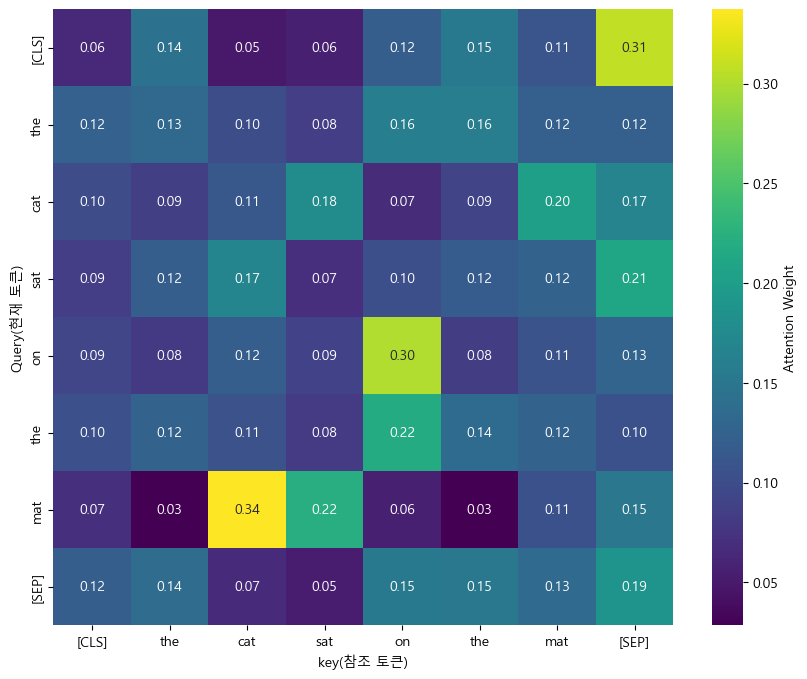

In [15]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 모델 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

#self-Attention 가중치 시각화
sentence = 'The cat sat on the mat'
# 1 토큰화
inputs = tokenizer(sentence,return_tensors='pt')
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
# 2 모델 실행(Attention 추출)
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  #12개 레이어의 Attention
# 3 첫번째 레이어, 첫 번째 헤드 Attention 시각화
attention = attentions[0][0,0].numpy()  
plt.figure(figsize=(10,8))
sns.heatmap(
    attention,
    xticklabels=tokens,
    yticklabels=tokens,
    cmap = 'viridis',
    annot = True,
    fmt = '.2f',
    cbar_kws={'label':'Attention Weight'}
)
plt.xlabel('key(참조 토큰)')
plt.ylabel('Query(현재 토큰)')

print(f'토큰목록 : {tokens}')
print(f'Attention 행렬 크기 : {attentions.shape}')

In [ ]:
# Bert 모델을 이용해서 영화리뷰 감성분석
# 데이터셋 : NLTK movie_reviews
# 모델 DistilBERT
# 평가 : 분류 리포트

In [18]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [ ]:
reviews = [movie_reviews.raw(id) for id in movie_reviews.fileids()]     # 리뷰 원문 추출
categoris = [ movie_reviews.categories(id)[0] for id in movie_reviews.fileids() ]   # 레이블(카테고리)추출

In [ ]:
# pos 1  eng 0
y =  np.array([1 if ca == 'pos' else 0 for ca in categoris])    # 레이블 숫자 변환
x_train,x_test,y_train,y_test = train_test_split(reviews,y, stratify=y,random_state=42)

In [ ]:

MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)   # 토크나이저로드 : 문자열 → 모델 입력용 토큰으로 변환
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)  # AutoModelForSequenceClassification : 문장 분류용 모델 구조 자동 로드
                    # from_pretrained(MODEL_NAME) : 사전 학습 + 감성분석 미세조정 모델 불러오기 

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [ ]:
# 예측함수
def predict_sentiment(texts, batch_size=0):
    '''
    배치단위로 감성 예측
    Args:
        texts: 리뷰 텍스트 리스트
        batch_size:한번에 처리할 샘플 수
    Returns:
        예측 레이블 배열
    '''
    model.eval()        # 모델을 추론 모드로 전환
    predictions = []
    #배치단위 처리
    num_batchs = (len(texts) + batch_size-1) // batch_size  # 103  20      (103+19)//20   (122)//20 
    with torch.no_grad():
        for i in tqdm(range(num_batchs),desc='예측 중'):
            # 배치추출
            batch_text = texts[ i*batch_size : (i+1)*batch_size  ]
            # 토큰화(최대 512토큰, 패딩적용)
            inputs = tokenizer(
                batch_text,
                truncation=True,
                padding=True,
                max_length = 512,
                return_tensors='pt'
          )
            inputs = { k: v.to(device) for k, v in inputs.items()  }
            # 모델 예측
            outputs =  model(**inputs)
            logits = outputs.logits
            # 확률변환
            probs = F.softmax(logits,dim=-1)
            preds =  probs.argmax(dim=-1).cpu().numpy()
            predictions.extend(preds)
        return np.array(predictions)



In [33]:

y_pred = predict_sentiment(x_test,batch_size=16)
print(classification_report(y_test, y_pred,target_names=['부정','긍정']))

예측 중:   0%|          | 0/32 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          부정       0.76      0.92      0.83       250
          긍정       0.90      0.70      0.79       250

    accuracy                           0.81       500
   macro avg       0.83      0.81      0.81       500
weighted avg       0.83      0.81      0.81       500



In [ ]:
# AutoTokenizer /AutoModel... GPT2-2 텍스트 생성
# 생성된 문장과 원본문장을 BERT를 이용해서 문장 유사도 계산

In [43]:
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSequenceClassification
# AutoModelForCausalLM 시퀀스의 다음단어를 앞 단어기반으로 한단계씩 예측  (자동 회귀 모델)  GPT GPT-Neo.. 등
# AutoModelForSequenceClassification  문장 문서분류(Classification) -> 감성분석 스펨 문장유사도 등..  BERT RoBERTa DistilBERT

#  텍스트 생성  GPT-2
GPT_MODEL_NAME = 'gpt2'
gpt_tokenizer = AutoTokenizer.from_pretrained(GPT_MODEL_NAME)
gpt_model = AutoModelForCausalLM.from_pretrained(GPT_MODEL_NAME)

prompt = 'once upon a time'

def generate_text(prompt,max_length=30):
    input_ids = gpt_tokenizer(prompt, return_tensors='pt').input_ids
    with torch.no_grad():
        output = gpt_model.generate(
            input_ids,
            max_length = max_length,
            num_return_sequences=1,
            temperature=0.8,
            top_k=50,
            top_p=0.95,
            do_sample=True,
            pad_token_id=gpt_tokenizer.eos_token_id
          )
    return gpt_tokenizer.decode(output[0],skip_special_tokens=True)

# BERT 모델(문장 유사도 MRPC)
BERT_MODEL_NAME = 'bert-base-cased-finetuned-mrpc'
bert_tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME)
bert_model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME)
def sentence_similarity(sent1,sent2):
    inputs = bert_tokenizer(sent1,sent2,return_tensors='pt')
    with torch.no_grad():
        logits = bert_model(**inputs).logits
        probs = torch.softmax(logits,dim=-1)[0]
    return{
        'not_similar' : probs[0].item(),
        'similar' : probs[1].item()
    }

prompts = [
    "Once upon a time",
    "In the year 2050,",
    "The secret to happiness is"
]

for prompt in prompts:
    # GPT-2 텍스트 생성
    generated = generate_text(prompt)
    # BERT 원본-생성문 유사도 계산
    similarity = sentence_similarity(prompt, generated)
    print(f'프롬프트 : {prompts}')
    print(f'생성 : {generated}')
    print(f'유사도 : {similarity}\n') 

c:\Users\SAMSUNG\miniconda3\envs\llm_env\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


프롬프트 : ['Once upon a time', 'In the year 2050,', 'The secret to happiness is']
생성 : Once upon a time, I would be a little more concerned about what my family would look like if I didn't have children."

"Yes
유사도 : {'not_similar': 0.9297948479652405, 'similar': 0.07020512968301773}

프롬프트 : ['Once upon a time', 'In the year 2050,', 'The secret to happiness is']
생성 : In the year 2050, there is already an estimated 25.5 million people living with HIV, and the proportion of those who are infected increases to 35
유사도 : {'not_similar': 0.9570308327674866, 'similar': 0.042969197034835815}

프롬프트 : ['Once upon a time', 'In the year 2050,', 'The secret to happiness is']
생성 : The secret to happiness is to have a good family. When you are with your family, it is an easy way to know which ones you like the
유사도 : {'not_similar': 0.8834722638130188, 'similar': 0.11652778834104538}

